# 1. Import and Install Dependencies

In [2]:
%pip install tensorflow==2.12.0 opencv-python matplotlib mediapipe

^C
Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
import tensorflow as tf

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
print("TensorFlow Keras imported successfully!")

TensorFlow Keras imported successfully!


# 2. Keypoints using MP Holistic

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [8]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
draw_landmarks(frame, results)

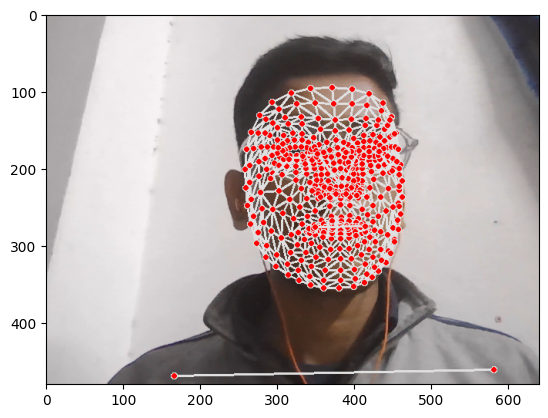

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [14]:

result_test = extract_keypoints(results)

In [15]:
result_test

array([ 0.59961128,  0.46580809, -1.65753484, ...,  0.        ,
        0.        ,  0.        ])

In [16]:
np.save('0', result_test)

In [17]:
np.load('0.npy')

array([ 0.59961128,  0.46580809, -1.65753484, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [18]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [19]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [20]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [21]:
label_map = {label:num for num, label in enumerate(actions)}

In [22]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [23]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [24]:
np.array(sequences).shape

(90, 30, 1662)

In [25]:
np.array(labels).shape

(90,)

In [26]:
X = np.array(sequences)

In [27]:
X.shape


(90, 30, 1662)

from skl

In [28]:
def to_categorical(y, num_classes=None, dtype="float32"):
    """Converts a class vector (integers) to binary class matrix.

    E.g. for use with `categorical_crossentropy`.

    Args:
        y: Array-like with class values to be converted into a matrix
            (integers from 0 to `num_classes - 1`).
        num_classes: Total number of classes. If `None`, this would be inferred
          as `max(y) + 1`.
        dtype: The data type expected by the input. Default: `'float32'`.

    Returns:
        A binary matrix representation of the input as a NumPy array. The class
        axis is placed last.

    Example:

    >>> a = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
    >>> print(a)
    [[1. 0. 0. 0.]
     [0. 1. 0. 0.]
     [0. 0. 1. 0.]
     [0. 0. 0. 1.]]

    >>> b = tf.constant([.9, .04, .03, .03,
    ...                  .3, .45, .15, .13,
    ...                  .04, .01, .94, .05,
    ...                  .12, .21, .5, .17],
    ...                 shape=[4, 4])
    >>> loss = tf.keras.backend.categorical_crossentropy(a, b)
    >>> print(np.around(loss, 5))
    [0.10536 0.82807 0.1011  1.77196]

    >>> loss = tf.keras.backend.categorical_crossentropy(a, a)
    >>> print(np.around(loss, 5))
    [0. 0. 0. 0.]
    """
    y = np.array(y, dtype="int")
    input_shape = y.shape

    # Shrink the last dimension if the shape is (..., 1).
    if input_shape and input_shape[-1] == 1 and len(input_shape) > 1:
        input_shape = tuple(input_shape[:-1])

    y = y.reshape(-1)
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes), dtype=dtype)
    categorical[np.arange(n), y] = 1
    output_shape = input_shape + (num_classes,)
    categorical = np.reshape(categorical, output_shape)
    return categorical
y = to_categorical(labels).astype(int)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [31]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [33]:
from tensorflow import keras

In [34]:

from keras import Sequential

In [35]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [36]:
import tensorflow as tf

import mediapipe as mp

print("All packages imported successfully!")


All packages imported successfully!


In [41]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

c:\Users\aojha\OneDrive\Attachments\code\new_venv2\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
res = [.7, 0.2, 0.1]

In [42]:
actions[np.argmax(res)]


'hello'

In [43]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [44]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - categorical_accuracy: 0.2857 - loss: 2.6025
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.3542 - loss: 15.5281
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.2779 - loss: 19.0534
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.4149 - loss: 9.2506
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.3189 - loss: 12.2959
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.2329 - loss: 15.2267
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.3092 - loss: 29.6234
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - categorical_accuracy: 0.2604 - loss: 53.8190
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - categorical_accuracy: 0.3425 - loss: 25.5517
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 0.3972 - loss: 19.3410
Epoch 11/2000
3/3 ━━━

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

# 8. Make Predictions

In [46]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


In [47]:
actions[np.argmax(res[4])]

'hello'

In [48]:
actions[np.argmax(y_test[4])]

'hello'

# 9. Save Weights

In [49]:
model.save('action.h5')

In [50]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [51]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [52]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

# 10. Evaluation using Confusion Matrix and Accuracy

In [53]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [1, 2]],

       [[3, 1],
        [0, 1]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [54]:
accuracy_score(ytrue, yhat)

0.8

# 11. Test in Real Time

In [55]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

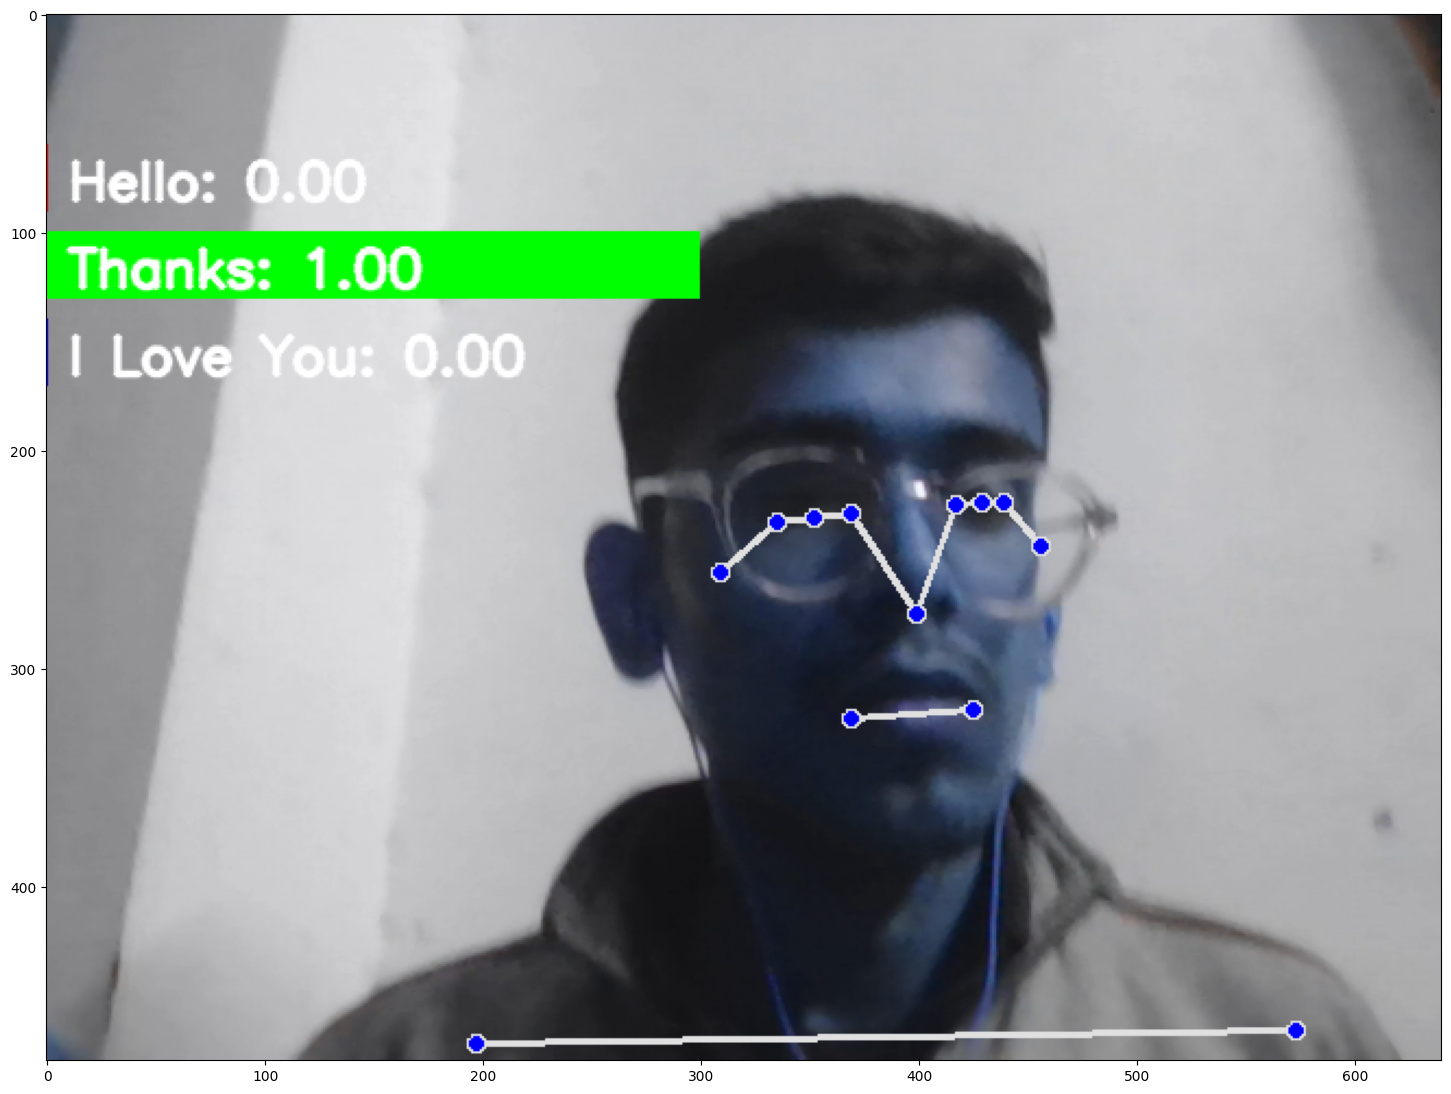

In [92]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [93]:
model = keras.models.load_model('action.h5')

In [97]:
print(f"Shape of extracted keypoints: {keypoints.shape}")

Shape of extracted keypoints: (225,)


In [98]:
print(f"Length of sequence: {len(sequence)}") 

Length of sequence: 30


In [100]:
print(f"Input Shape to Model: {sequence_reshaped.shape}")

Input Shape to Model: (1, 30, 225)


In [57]:
print("res:", res)
print("Type of prob:", type(res[0]))

res: [[2.7978845e-07 1.0735315e-03 9.9892622e-01]
 [9.9999475e-01 3.5004143e-06 1.7769545e-06]
 [3.0003893e-01 6.9995594e-01 5.1690199e-06]
 [2.1492100e-05 9.9997568e-01 2.8581787e-06]
 [7.8869063e-01 2.1130046e-01 8.9579535e-06]]
Type of prob: <class 'numpy.ndarray'>


In [66]:
def prob_viz(res, actions, input_frame, colors):
    """
    Visualizes the probabilities for each action on the input frame.

    Args:
    - res: List or numpy array of probabilities for each action.
    - actions: List of action names corresponding to probabilities.
    - input_frame: The image frame to draw on.
    - colors: List of color tuples (BGR) for each action.

    Returns:
    - output_frame: The frame with visualized probabilities.
    """
    output_frame = input_frame.copy()

    # Ensure `res` is iterable (e.g., convert scalar to 1D array)
    res = np.atleast_1d(res)

    for num, prob in enumerate(res):
        scalar_prob = float(prob)  # Convert to scalar for OpenCV functions
        cv2.rectangle(output_frame, (0, 60 + num * 40),
                      (int(scalar_prob * 300), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, f"{actions[num]}: {scalar_prob:.2f}", (10, 85 + num * 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)

    return output_frame


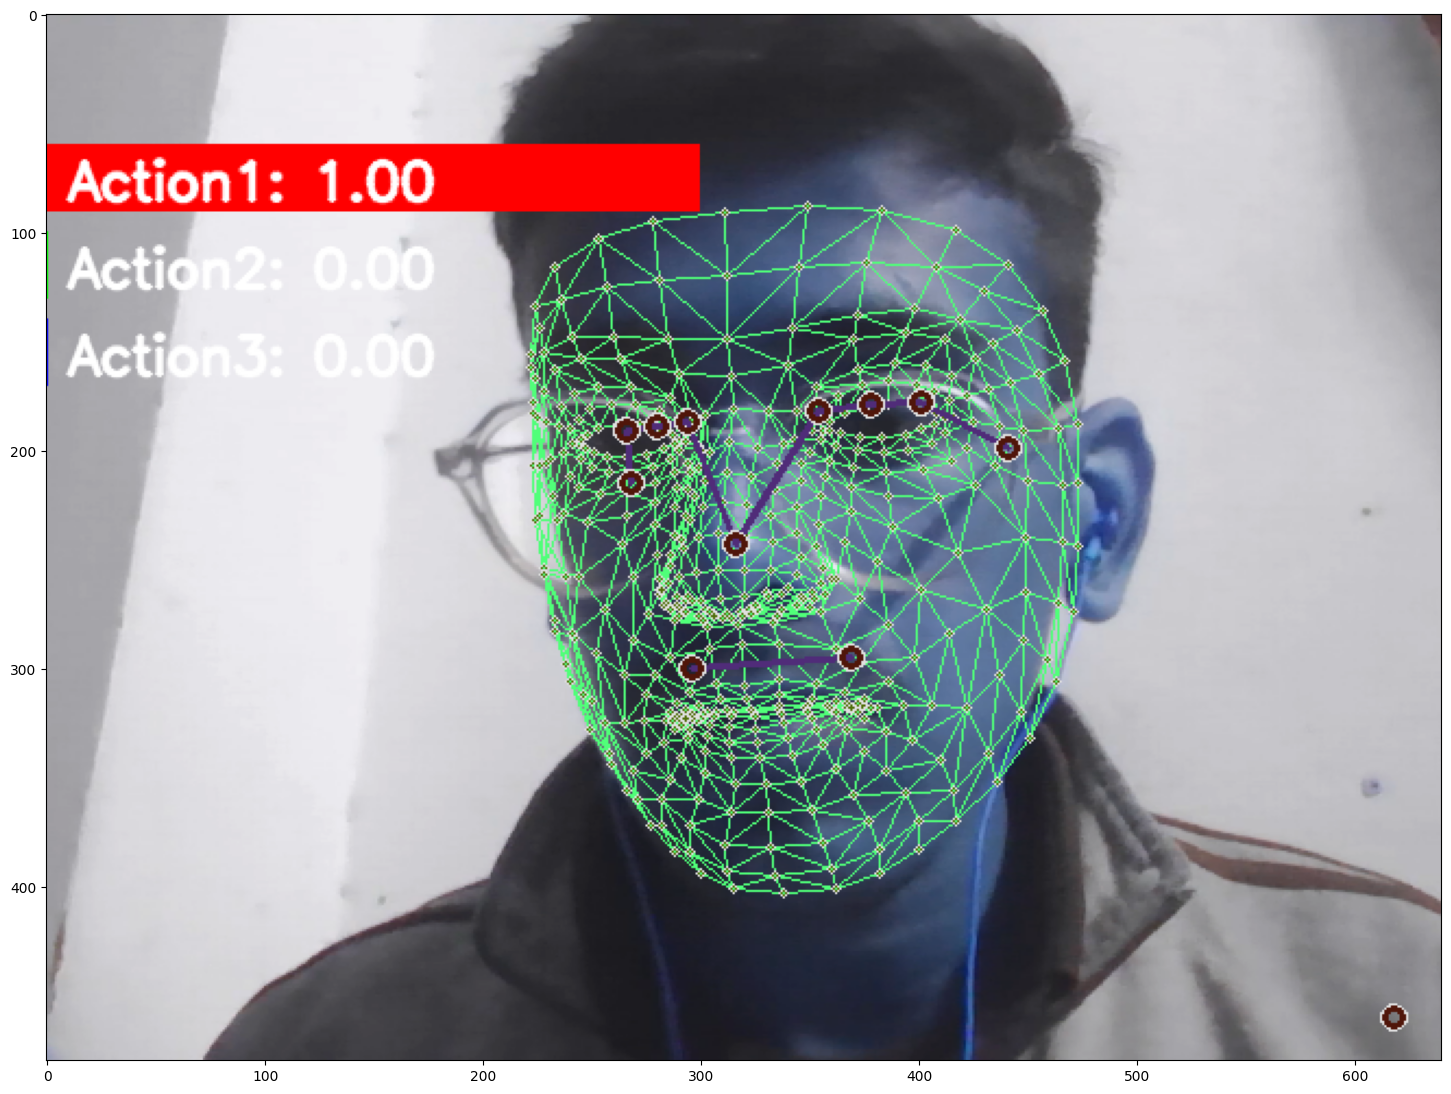

In [67]:
# Example: Visualize for a single frame (e.g., first row of `res`)
single_res = res[0]  # Pick the first row if needed
output_image = prob_viz([single_res], actions, image, colors)

# Visualize for averaged probabilities
output_image = prob_viz(res, actions, image, colors)

# Display the output
plt.figure(figsize=(18, 18))
plt.imshow(output_image)
plt.show()


In [74]:
actions = ["Hello", "Thanks", "I Love You"]

In [75]:
actions

['Hello', 'Thanks', 'I Love You']

In [76]:
model = keras.models.load_model('action.h5')

In [77]:
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  # RGB tuples

In [78]:
aggregated_res = res[0]  # Visualize only the first row


In [103]:
model = tf.keras.models.load_model(r"C:\Users\aojha\OneDrive\Attachments\code\action.h5")


In [104]:
import cv2
import numpy as np
import mediapipe as mp
from tensorflow.keras.models import load_model

# Initialize MediaPipe
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Load your pre-trained model (example)
model = load_model('your_model.h5')
actions = ['action1', 'action2', 'action3', ...]  # List of actions corresponding to model outputs

# Initialize variables
sequence = []
sentence = []
threshold = 0.8

# Open video capture
cap = cv2.VideoCapture(0)

# Define helper functions
def mediapipe_detection(image, model):
    # Function for detecting landmarks and keypoints from image using mediapipe
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = model.process(image_rgb)
    return image, results

def extract_keypoints(results):
    # Function to extract keypoints from the MediaPipe results
    keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            keypoints.append([landmark.x, landmark.y, landmark.z])
    return np.array(keypoints).flatten()

def prob_viz(res, actions, image, colors):
    # Visualization function to display probabilities (if any)
    return image  # You can modify this for visualization purposes

# Set MediaPipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            print("Error: Failed to capture frame.")
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)

        # Draw landmarks on image
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        print(f"Shape of extracted keypoints: {keypoints.shape}")  # Debugging keypoints shape
        
        # Ensure sequence holds 30 frames
        sequence.append(keypoints)
        sequence = sequence[-30:]  # Keep only the last 30 frames
        
        # Check sequence length
        print(f"Length of sequence: {len(sequence)}")  # Debugging sequence length
        
        # Ensure sequence has 30 frames for prediction
        if len(sequence) == 30:
            # Reshape sequence to (1, 30, 225)
            sequence_reshaped = np.expand_dims(sequence, axis=0)  # Shape: (1, 30, 225)
            print(f"Input Shape to Model: {sequence_reshaped.shape}")  # Debugging shape
            
            # Predict using the model
            try:
                res = model.predict(sequence_reshaped)[0]
                print(f"Prediction Results: {res}")  # Debugging prediction output
                predicted_action = actions[np.argmax(res)]
                print(f"Predicted Action: {predicted_action}")

                # 3. Viz logic (if prediction exceeds threshold)
                if res[np.argmax(res)] > threshold:
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

                # Keep only the last 5 predictions in sentence
                if len(sentence) > 5:
                    sentence = sentence[-5:]

                # Visualize the result
                image = prob_viz(res, actions, image, colors)

            except Exception as e:
                print(f"Error during prediction: {e}")

        # Add overlay text on image (last 5 actions)
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Display the image
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully if 'q' key is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'your_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [106]:
model.save('model.keras')


In [ ]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

def draw_styled_landmarks(image, results):
    mp_holistic = mp.solutions.holistic
    mp_drawing = mp.solutions.drawing_utils

    # Draw landmarks
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z]
                     for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 3)
    lh = np.array([[res.x, res.y, res.z]
                   for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
    rh = np.array([[res.x, res.y, res.z]
                   for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)
    return np.concatenate([pose, lh, rh])

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    res = np.atleast_1d(res)

    for num, prob in enumerate(res):
        scalar_prob = float(prob)
        cv2.rectangle(output_frame, (0, 60 + num * 40),
                      (int(scalar_prob * 300), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, f"{actions[num]}: {scalar_prob:.2f}", (10, 85 + num * 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)

    return output_frame

# Main loop
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not access the camera.")
    exit()

print("Camera initialized. Starting feed...")

with mp.solutions.holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture frame.")
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)

        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        if len(sequence) == 30:
            # Reshape the sequence to be (1, 30, num_features), where num_features is the number of features per timestep
            sequence_reshaped = np.expand_dims(sequence, axis=0)  # Shape will be (1, 30, num_features)
    
    # Make the prediction
            res = model.predict(sequence_reshaped)[0]
        print(actions[np.argmax(res)])

    if res[np.argmax(res)] > threshold:
        if len(sentence) > 0:
            if actions[np.argmax(res)] != sentence[-1]:
                sentence.append(actions[np.argmax(res)])
        else:
            sentence.append(actions[np.argmax(res)])
    
    if len(sentence) > 5:
        sentence = sentence[-5:]
    
    # Visualization of probabilities
    image = prob_viz(res, actions, image, colors)

        
        # Add text to the image
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Display the video feed
        cv2.imshow('OpenCV Feed', image)

        # Quit the video feed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


Camera initialized. Starting feed...


ValueError: Exception encountered when calling LSTMCell.call().

[1mDimensions must be equal, but are 225 and 1662 for '{{node sequential_1/lstm_1/lstm_cell_1/MatMul}} = MatMul[T=DT_FLOAT, grad_a=false, grad_b=false, transpose_a=false, transpose_b=false](sequential_1/lstm_1/strided_slice_1, sequential_1/lstm_1/lstm_cell_1/Cast/ReadVariableOp)' with input shapes: [1,225], [1662,256].[0m

Arguments received by LSTMCell.call():
  • inputs=tf.Tensor(shape=(1, 225), dtype=float32)
  • states=('tf.Tensor(shape=(1, 64), dtype=float32)', 'tf.Tensor(shape=(1, 64), dtype=float32)')
  • training=False

In [101]:
# New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)

# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()
        
        if not ret:
            print("Error: Failed to capture frame.")
            break
        
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        
        # Check the shape of keypoints (should be 225 elements)
        print(f"Shape of extracted keypoints: {keypoints.shape}")  # Debugging keypoints shape
        
        # Ensure sequence holds 30 frames of keypoints
        sequence.append(keypoints)
        sequence = sequence[-30:]  # Keep only the last 30 frames
        
        # Check the length of the sequence
        print(f"Length of sequence: {len(sequence)}")  # Debugging sequence length
        
        # Check if the sequence has 30 frames
        if len(sequence) == 30:
            # Reshape sequence to (1, 30, 225)
            sequence_reshaped = np.expand_dims(sequence, axis=0)  # Shape: (1, 30, 225)
            print(f"Input Shape to Model: {sequence_reshaped.shape}")  # Debugging shape
            
            # Predict using the model
            res = model.predict(sequence_reshaped)[0]
            print(actions[np.argmax(res)])
            
            # 3. Viz logic
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])
            
            if len(sentence) > 5:
                sentence = sentence[-5:]
            
            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
        
        # Add text to image
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shape of extracted keypoints: (225,)
Length of sequence: 1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shape of extracted keypoints: (225,)
Length of sequence: 2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shape of extracted keypoints: (225,)
Length of sequence: 3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shape of extracted keypoints: (225,)
Length of sequence: 4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shape of extracted keypoints: (225,)
Length of sequence: 5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shape of extracted keypoints: (225,)
Length of sequence: 6
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shape of extracted keypoints: (225,)
Length of sequence: 7
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shape of extracted keypoints: (225,)
Length of sequence: 8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shape of extrac

ValueError: Exception encountered when calling LSTMCell.call().

[1mDimensions must be equal, but are 225 and 1662 for '{{node sequential_1/lstm_1/lstm_cell_1/MatMul}} = MatMul[T=DT_FLOAT, grad_a=false, grad_b=false, transpose_a=false, transpose_b=false](sequential_1/lstm_1/strided_slice_1, sequential_1/lstm_1/lstm_cell_1/Cast/ReadVariableOp)' with input shapes: [1,225], [1662,256].[0m

Arguments received by LSTMCell.call():
  • inputs=tf.Tensor(shape=(1, 225), dtype=float32)
  • states=('tf.Tensor(shape=(1, 64), dtype=float32)', 'tf.Tensor(shape=(1, 64), dtype=float32)')
  • training=False